# Import Libraries and Read Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# PPH 2013

In [ ]:
excel_file = "PPH2013.xlsx"

## Pola Konsumsi Pangan Wilayah (2013 - I)

In [ ]:
def show_pola_konsumsi_pangan_wilayah(excel_file: str, sheet_name: str):
    excel_file = "../datasets/"+excel_file
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    df = df.iloc[:,2:]
    row_to_find = "POLA KONSUMSI PANGAN WILAYAH"
    row_to_find_index = df[df["Unnamed: 2"]==row_to_find].index.values[0]

    pola_konsumsi_pangan_wilayah = df.iloc[row_to_find_index+1:]
    empty_columns = find_empty_columns(pola_konsumsi_pangan_wilayah)
    pola_konsumsi_pangan_wilayah.drop(empty_columns,axis=1,inplace=True)

    buah_sayur_koloms = [f"Unnamed: {i}" for i in range(18,22)]

    pola_konsumsi_pangan_wilayah.drop(buah_sayur_koloms,axis=1,inplace=True)
    pola_konsumsi_pangan_wilayah_column_names = pola_konsumsi_pangan_wilayah.iloc[0]
    pola_konsumsi_pangan_wilayah.columns = pola_konsumsi_pangan_wilayah_column_names
    pola_konsumsi_pangan_wilayah = pola_konsumsi_pangan_wilayah.iloc[1:,:]
    pola_konsumsi_pangan_wilayah = pola_konsumsi_pangan_wilayah[:7]
    
    display(pola_konsumsi_pangan_wilayah)

def find_empty_columns(df):
    empty_columns = []
    for col in df:
        first_row = df.iloc[0][col]
        second_row = df.iloc[1][col]
        third_row = df.iloc[2][col]
        if (first_row is np.nan or isinstance(first_row,float)) and (second_row is np.nan or isinstance(second_row,float)) and (third_row is np.nan or isinstance(third_row,float)): 
            empty_columns.append(col)
    return empty_columns

sheet_name = "POLA KONSUMSI(2013-I)"
show_pola_konsumsi_pangan_wilayah(excel_file, sheet_name)

# Pola Konsumsi Pangan Wilayah (2013 - II)

In [ ]:
sheet_name = "POLA KONSUMSI(2013-II)"
show_pola_konsumsi_pangan_wilayah(excel_file, sheet_name)

## FREKUENSI KLMPK PANGAN(2013-I)

In [ ]:
def show_frekuensi_kelompok_pangan(excel_file: str, sheet_name: str, buah_name: str):
    excel_file = "../datasets/"+excel_file
    df = pd.read_excel(excel_file, sheet_name=sheet_name).iloc[6:]
    df.drop("Unnamed: 0",axis=1,inplace=True)
    df_columns = df.iloc[2]
    nan_columns_indexes = [i for i in range(len(df_columns)) if (df_columns[i] is np.nan)]
    columns_to_modify = ["<3 kali","3-5 kali","6-10 kali",">10 kali","total"]
    for i,mod in zip(nan_columns_indexes,columns_to_modify): df_columns[i] = f"{mod} (%)"
    df.columns = df_columns
    col_to_modify_2_index= [i for i in range(2,11) if i not in nan_columns_indexes]
    for i in col_to_modify_2_index:
        df_columns[i] += " (n)"
    
    kelompok_names = ["1. Frekuensi Konsumsi Sayur-Sayuran","2. Frekuensi Konsumsi Buah-Buahan","3. Frekuensi Konsumsi Umbi-Umbian","4. Frekuensi Konsumsi Pangan Hewani","5. Frekuensi Konsumsi Kacang-Kacangan"]

    df.columns.name = ""

    buah_name = buah_name.lower().strip()
    if buah_name == "sayur":
        print(kelompok_names[0])
        display(df[5:5+7])
    elif buah_name == "buah":
        print(kelompok_names[1])
        display(df[20:20+7])
    elif buah_name == "umbi":
        print(kelompok_names[2])
        display(df[39:39+7])
    elif buah_name == "hewani":
        print(kelompok_names[3])
        display(df[54:54+7])
    elif buah_name == "kacang":
        print(kelompok_names[4])
        display(df[69:69+7])
    

sheet_name = "FREKUENSI KLMPK PANGAN(2013-I)"
buah_names = ["sayur","buah","umbi","hewani","kacang"]
for buah in buah_names:
    show_frekuensi_kelompok_pangan(excel_file, sheet_name,buah)

## FREKUENSI KLMPK PANGAN(2013-II)

In [ ]:
sheet_name = "FREKUENSI KLMPK PANGAN(2013-II)"
for buah in buah_names:
    show_frekuensi_kelompok_pangan(excel_file, sheet_name,buah)

## Skor PPH(2013-I)

In [ ]:
def show_skor_pph(excel_file: str,sheet_name: str):
    excel_file = "../datasets/"+excel_file
    pph_2013_skor_pph_2013 = pd.read_excel(excel_file, sheet_name=sheet_name).iloc[6:,1:]
    get_first_three_columns = pph_2013_skor_pph_2013.iloc[0:,:3].iloc[0].tolist()
    pph_2013_skor_pph_2013 = pph_2013_skor_pph_2013.iloc[1:]
    rest_column_names = pph_2013_skor_pph_2013.iloc[0][2:].tolist()
    column_names = get_first_three_columns + rest_column_names
    column_names.remove("Perhitungan Skor Pola Pangan Harapan (PPH)")
    pph_2013_skor_pph_2013 = pph_2013_skor_pph_2013.iloc[2:]
    pph_2013_skor_pph_2013.columns = column_names
    total_row = pph_2013_skor_pph_2013.iloc[10:].iloc[0].tolist()
    total_row[0] = "10."
    for i in range(len(total_row)):
        if (total_row[i] is np.nan): total_row[i] = '-' 
    pph_2013_skor_pph_2013 = pph_2013_skor_pph_2013.iloc[:9] 
    pph_2013_skor_pph_2013.loc[len(pph_2013_skor_pph_2013)+10] = total_row
#     display(pph_2013_skor_pph_2013)
    return pph_2013_skor_pph_2013
    
sheet_name = "Skor PPH(2013-I)"
df_skor_pph_2013_1 = show_skor_pph(excel_file,sheet_name)
df_skor_pph_2013_1

## Skor PPH(2013-II)

In [ ]:
sheet_name = "Skor PPH(2013-II)"
df_skor_pph_2013_2 = show_skor_pph(excel_file,sheet_name)
df_skor_pph_2013_2

# PPH 2014

In [ ]:
excel_file = "PPH2014.xlsx"
sheet_name = "Skor PPH (2014)"

## Frekuensi Kelompok Pangan 2014

In [ ]:
for buah in buah_names:
    show_frekuensi_kelompok_pangan(excel_file, sheet_name,buah)

## Skor PPH 2014

In [ ]:
show_skor_pph(excel_file, sheet_name)

In [ ]:
def show_barplot_2013(x_axis_1: list, x_axis_2: list, y_axis: list, title:str, x_lable:str,y_lable:str):
    Y_axis = np.arange(len(y_axis))

    plt.barh(Y_axis - 0.2, x_axis_1, 0.4, label = 'Kalori (I)')
    plt.barh(Y_axis + 0.2, x_axis_2, 0.4, label = 'Kalori (II)')

    plt.yticks(Y_axis, y_axis)

    plt.ylabel(y_lable)
    plt.xlabel(x_lable)
    
    plt.title(title)
    plt.legend()
    plt.show()

## Kelompok Pangan vs Kalori Bar Chart

In [ ]:
y_axis = df_skor_pph_2013_2["Kelompok Pangan"].astype(str).tolist()[:-1]
x_axis_1 = df_skor_pph_2013_1["Kalori"].tolist()[:-1]
x_axis_2 = df_skor_pph_2013_2["Kalori"].tolist()[:-1]
show_barplot_2013(x_axis_1, x_axis_2, y_axis, "Kelompok Pangan vs Kalori","Kalori","Kelompok Pangan")

## Kelompok Pangan vs Skor PPH

In [ ]:
y_axis = df_skor_pph_2013_2["Kelompok Pangan"].astype(str).tolist()[:-1]
x_axis_1 = df_skor_pph_2013_1["Skor PPH"].tolist()[:-1]
x_axis_2 = df_skor_pph_2013_2["Skor PPH"].tolist()[:-1]
show_barplot_2013(x_axis_1, x_axis_2, y_axis, "Kelompok Pangan vs Skor PPH","Skor PPH","Kelompok Pangan")

# Harga Pangan di Pasar Astambul 2017

In [ ]:
excel_file = "HARGA PANGAN DI PASAR ASTAMBUL 2017.xlsx"

def get_pasar_name(excel_file: str): return excel_file[:-5]

def show_harga_pangan_di_pasar_x(excel_file:str, sheet_name: str):
    print(get_pasar_name(excel_file))
    print(sheet_name)
    excel_file = "../datasets/"+excel_file
    col_names = []
    df = pd.read_excel(excel_file, sheet_name=sheet_name).iloc[5:]
    iloc_2 = df.iloc[2]
    for col1,col2 in zip(df.iloc[0],df.iloc[1]):
        if not isinstance(col1,float):
            col_names.append(col1)
        if not isinstance(col2,float):
            col_names.append(col2)
    col_names.remove("Harga")
    empty_columns = find_empty_columns(df)
    df.drop(empty_columns,axis=1,inplace=True)
    df = df.iloc[3:]
    df.drop(["Unnamed: 1"],axis=1,inplace=True)

    index_to_drop = []
    for idx,rows in zip(df.index,df.values.tolist()):
        unique_rows = list(set(rows[1:]))
        if len(unique_rows) == 1 and (unique_rows[0] == '-' or isinstance(unique_rows[0],float) or unique_rows is np.nan):
            index_to_drop.append(idx)
        if ('-' in unique_rows and np.nan in unique_rows) and idx not in index_to_drop:
            index_to_drop.append(idx)

    df.drop(labels=index_to_drop,axis=0,inplace=True)

    if len(col_names) == 3:
        dates_to_add = iloc_2.iloc[4:-2].tolist()
        if isinstance(dates_to_add[-1],float): dates_to_add = dates_to_add[:-1]
        for date in dates_to_add: col_names.append(date)
    
    col_names.remove("Rata-Rata")
    col_names.append("Rata-Rata")

    col_names.remove("No.")
    df.columns = col_names

    df = df.replace('-', 0)
    display(df)
    return df

sheet_names = ["MARET","APRIL","MEI","JUNI","JULI","AGUSTUS","SEPTEMBER","OKTOBER","NOVEMBER","DESEMBER"]
excel_file = "HARGA PANGAN DI PASAR ASTAMBUL 2017.xlsx"
for sheet_name in sheet_names:
    show_harga_pangan_di_pasar_x(excel_file, sheet_name)

## Pasar Astambul Time Series Plot

In [ ]:
import numpy as np

def show_time_series_plot_for_pasar_x(excel_file):
    if excel_file == "HARGA PANGAN DI PASAR MARTAPURA 2017.xlsx":
        sheet_names = ["MARET", "APRIL", "MEI", "JUNI", "JULI", "AGUSTUS", "SEPTEMBER"]
    else:
        sheet_names = ["MARET", "APRIL", "MEI", "JUNI", "JULI", "AGUSTUS", "SEPTEMBER", "OKTOBER", "NOVEMBER", "DESEMBER"]

    for sheet_name in sheet_names:
        astambul = show_harga_pangan_di_pasar_x(excel_file, sheet_name)

        astambul_date_list = astambul.columns[1:-1].tolist()

        commodity_list = astambul['Komoditas'].tolist()

        # Define a list of colors to use for each commodity
        colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal', 'cyan', 'magenta']

        # Compute number of rows and columns needed to display all the plots
        num_commodities = len(commodity_list)
        num_rows = (num_commodities + 3) // 4  # Round up to the nearest integer
        num_cols = min(num_commodities, 4)

        fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), squeeze=False)

        for i, commodity in enumerate(commodity_list):
            row = i // num_cols
            col = i % num_cols
            price_list = list(astambul[astambul['Komoditas'] == commodity].iloc[0, 1:-1])
            df = pd.DataFrame({'Date': astambul_date_list, 'Price': price_list})
            axs[row, col].plot(df["Date"], df["Price"], color=colors[i % len(colors)], marker='o', linestyle='-', linewidth=2)
            axs[row, col].set_title(commodity)
            axs[row, col].set_xlabel("Date")
            axs[row, col].set_ylabel("Price")

            # Add labels with dots connecting the lines
            for x, y in zip(df["Date"], df["Price"]):
                axs[row, col].annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
                axs[row, col].plot(x, y, marker='o', markersize=4, color='black')

        # Hide unused subplots
        for i in range(num_commodities, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            axs[row, col].axis('off')

        # Add some space between each subplot
        fig.subplots_adjust(hspace=0.5, wspace=0.3)

        plt.show()

excel_file = "HARGA PANGAN DI PASAR ASTAMBUL 2017.xlsx"
show_time_series_plot_for_pasar_x(excel_file)

In [ ]:
from scipy import stats

def show_analisa_statistik_for_harga_pangan(excel_file):
    if excel_file == "HARGA PANGAN DI PASAR MARTAPURA 2017.xlsx":
        sheet_names = ["MARET","APRIL","MEI","JUNI","JULI","AGUSTUS","SEPTEMBER"]
    else:
        sheet_names = ["MARET","APRIL","MEI","JUNI","JULI","AGUSTUS","SEPTEMBER","OKTOBER","NOVEMBER","DESEMBER"]

    # sheet_names = ["AGUSTUS"]
    for sheet_name in sheet_names:
        astambul = show_harga_pangan_di_pasar_x(excel_file,sheet_name)

        astambul_date_list = astambul.columns[1:-1].tolist()

        commodity_list = astambul['Komoditas'].tolist()

        # Define a list of colors to use for each commodity
        colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal', 'cyan', 'magenta']

        # Compute number of rows and columns needed to display all the plots
        num_commodities = len(commodity_list)
        num_rows = (num_commodities + 3) // 4  # Round up to the nearest integer
        num_cols = min(num_commodities, 4)

        fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), squeeze=False)

        for i, commodity in enumerate(commodity_list):
            row = i // num_cols
            col = i % num_cols
            price_list = list(astambul[astambul['Komoditas'] == commodity].iloc[0,1:-1])
            df = pd.DataFrame({'Date': astambul_date_list, 'Price': price_list})
            axs[row, col].plot(df["Date"], df["Price"], color=colors[i % len(colors)])
            axs[row, col].set_title(commodity)
            axs[row, col].set_xlabel("Date")
            axs[row, col].set_ylabel("Price")

            # Compute statistics for the commodity
            median = np.median(price_list)
            mode = stats.mode(price_list)[0][0]
            mean = np.mean(price_list)
            std_dev = np.std(price_list)

            # Plot statistics as horizontal lines
            axs[row, col].axhline(median, linestyle='--', color='purple', label='Median')
            axs[row, col].axhline(mode, linestyle='--', color='orange', label='Mode')
            axs[row, col].axhline(mean, linestyle='--', color='green', label='Mean')
            axs[row, col].axhline(mean + std_dev, linestyle='--', color='blue', label='Mean + Std Dev')
            axs[row, col].axhline(mean - std_dev, linestyle='--', color='red', label='Mean - Std Dev')
            axs[row, col].legend()

        # Hide unused subplots
        for i in range(num_commodities, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            axs[row,col].axis('off')
                # Add some space between each subplot
        fig.subplots_adjust(hspace=0.5, wspace=0.3)

        # Compute median, mode, and average for each commodity
        median_prices = []
        mode_prices = []
        mean_prices = []
        for commodity in commodity_list:
            price_list = list(astambul[astambul['Komoditas'] == commodity].iloc[0,1:-1])
            median_prices.append(np.median(price_list))
            mode_prices.append(stats.mode(price_list)[0][0])
            mean_prices.append(np.mean(price_list))

        # Plot median, mode, and average as vertical lines
        for i, ax in enumerate(axs.flatten()):
            if i < num_commodities:
                ax.axhline(y=median_prices[i], color='r', linestyle='--', label=f"Median: {median_prices[i]:.2f}")
                ax.axhline(y=mode_prices[i], color='g', linestyle='--', label=f"Mode: {mode_prices[i]:.2f}")
                ax.axhline(y=mean_prices[i], color='b', linestyle='--', label=f"Average: {mean_prices[i]:.2f}")
                ax.legend(loc='upper left')

        plt.show()

excel_file = "HARGA PANGAN DI PASAR ASTAMBUL 2017.xlsx"
show_analisa_statistik_for_harga_pangan(excel_file)

In [ ]:
sheet_names = ["MARET","APRIL","MEI","JUNI","JULI","AGUSTUS","SEPTEMBER","OKTOBER","NOVEMBER","DESEMBER"]
excel_file = "HARGA PANGAN DI PASAR GAMBUT 2017.xlsx"
for sheet_name in sheet_names:
    show_harga_pangan_di_pasar_x(excel_file, sheet_name)

## Time Series Plot Pasar Gambut

In [ ]:
excel_file = "HARGA PANGAN DI PASAR GAMBUT 2017.xlsx"
show_time_series_plot_for_pasar_x(excel_file)

# Harga Pangan di Pasar Gambut 2017

In [ ]:
excel_file = "HARGA PANGAN DI PASAR GAMBUT 2017.xlsx"
sheet_name = "MARET"
show_harga_pangan_di_pasar_x(excel_file,sheet_name)

## Time Series Plot Pasar Martapura

In [ ]:
sheet_names = ["MARET","APRIL","MEI","JUNI","JULI","AGUSTUS","SEPTEMBER"]
excel_file = "HARGA PANGAN DI PASAR MARTAPURA 2017.xlsx"
for sheet_name in sheet_names:
    show_harga_pangan_di_pasar_x(excel_file, sheet_name)

In [ ]:
excel_file = "HARGA PANGAN DI PASAR MARTAPURA 2017.xlsx"
show_time_series_plot_for_pasar_x(excel_file)

# Harga Pangan Di Pasar Martapura

In [ ]:
excel_file = "HARGA PANGAN DI PASAR MARTAPURA 2017.xlsx"
for sheet_name in sheet_names:
    show_harga_pangan_di_pasar_x(excel_file, sheet_name)

## Data Mining (Regresi)

## Martapura

In [34]:
excel_file = "HARGA PANGAN DI PASAR MARTAPURA 2017.xlsx"
training_sheet_names = ["MARET","APRIL","MEI","JUNI","JULI"]
testing_sheet_names = ["AGUSTUS","SEPTEMBER"]

def make_training_testing_raw_dfs(excel_file, training_sheet_names: list, testing_sheet_names: list):
    dfs = []
    komoditas_list = show_harga_pangan_di_pasar_x(excel_file, training_sheet_names[0])["Komoditas"].tolist()

    for sheet in training_sheet_names:
        df = show_harga_pangan_di_pasar_x(excel_file, sheet).iloc[:,1:-1]
        df.reset_index(drop=True, inplace=True)
        dfs.append(df)

    if excel_file == "HARGA PANGAN DI PASAR ASTAMBUL 2017.xlsx":
        pasar_reg_df_raw_train = pd.concat(dfs, axis=1)
    else:
        pasar_reg_df_raw_train = pd.concat(dfs, axis=1)[:-1]
        
    pasar_reg_df_raw_train.insert(0, 'Komoditas', komoditas_list)

    test_dfs = []

    for sheet in testing_sheet_names:
        df = show_harga_pangan_di_pasar_x(excel_file, sheet).iloc[:,1:-1]
        df.reset_index(drop=True, inplace=True)
        test_dfs.append(df)

    pasar_reg_df_raw_test = pd.concat(test_dfs, axis=1)[:-1]

    return pasar_reg_df_raw_train, pasar_reg_df_raw_test

In [35]:
import numpy as np

def split_dd_mm_format(date: str):
    date,month = date.split()
    return date,month

def convert_month_to_number(month: str):
    month_dict = {
        'Jan': 1,
        'Feb': 2,
        'Mar': 3,
        'Apr': 4,
        'Mei': 5,
        'Jun': 6,
        'Jul': 7,
        'Agt': 8,
        'Sep': 9,
        'Okt': 10,
        'Nov': 11,
        'Des': 12
    }

    return month_dict[month]

def make_x_test(test_df):
    # Assuming the first test_df columns is Komoditas
    test_df = test_df.iloc[:,1:]
    dates = test_df.columns.tolist()
    test_months = [int(convert_month_to_number(split_dd_mm_format(month)[1])) for month in dates]
    test_days = [int(split_dd_mm_format(day)[0]) for day in dates]
    x_test_array = []
    for day,month in zip(test_months,test_days): x_test_array.append([day,month])
    return np.array(x_test_array)

HARGA PANGAN DI PASAR GAMBUT 2017
MARET


,Komoditas,06 Mar,13 Mar,20 Mar,27 Mar,Rata-Rata
8,Beras Premium,12000,12000,12000,13250,12312.5
9,Beras Medium,9500,9750,10750,10750,10187.5
10,Beras Termurah,7200,8500,8500,8500,8175
13,Kacang Tanah,24000,24000,24000,25000,24250
14,Gula Pasir,12000,12500,12000,12500,12250
16,Bawang Merah,38000,34000,28000,28000,32000
17,Bawang Putih,36000,36000,36000,36000,36000
19,Cabe Merah Besar,30000,40000,70000,25000,41250
20,Cabe Merah Keriting,30000,40000,50000,30000,37500
21,Cabe Rawit,100000,90000,90000,70000,87500


HARGA PANGAN DI PASAR GAMBUT 2017
MARET


,Komoditas,06 Mar,13 Mar,20 Mar,27 Mar,Rata-Rata
8,Beras Premium,12000,12000,12000,13250,12312.5
9,Beras Medium,9500,9750,10750,10750,10187.5
10,Beras Termurah,7200,8500,8500,8500,8175
13,Kacang Tanah,24000,24000,24000,25000,24250
14,Gula Pasir,12000,12500,12000,12500,12250
16,Bawang Merah,38000,34000,28000,28000,32000
17,Bawang Putih,36000,36000,36000,36000,36000
19,Cabe Merah Besar,30000,40000,70000,25000,41250
20,Cabe Merah Keriting,30000,40000,50000,30000,37500
21,Cabe Rawit,100000,90000,90000,70000,87500


HARGA PANGAN DI PASAR GAMBUT 2017
APRIL


,Komoditas,03 Apr,10 Apr,17 Apr,24 Apr,Rata-Rata
8,Beras Premium,13250,14500,14500,14500,14187.5
9,Beras Medium,10750,12000,12000,12000,11687.5
10,Beras Termurah,7800,8500,8500,8500,8325.0
12,Kedelai,0,0,15000,0,15000.0
13,Kacang Tanah,25000,25000,25000,25000,25000.0
14,Gula Pasir,12500,12500,12500,12500,12500.0
16,Bawang Merah,36000,28000,25000,28000,29250.0
17,Bawang Putih,36000,40000,30000,38000,36000.0
19,Cabe Merah Besar,40000,25000,25000,25000,28750.0
20,Cabe Merah Keriting,40000,25000,30000,30000,31250.0


HARGA PANGAN DI PASAR GAMBUT 2017
MEI


,Komoditas,01 Mei,08 Mei,15 Mei,22 Mei,29 Mei,Rata-Rata
8,Beras Premium,13250,13250,13250,13250,13250,13250
9,Beras Medium,9750,10750,10750,10750,10750,10550
10,Beras Termurah,8500,8500,8500,8500,8500,8500
13,Kacang Tanah,25000,25000,25000,25000,25000,25000
14,Gula Pasir,12500,12500,12500,12800,13000,12660
16,Bawang Merah,20000,22000,25000,22000,20000,21800
17,Bawang Putih,40000,45000,46000,50000,55000,47200
19,Cabe Merah Besar,25000,25000,20000,28000,30000,25600
20,Cabe Merah Keriting,30000,30000,30000,30000,30000,30000
21,Cabe Rawit,50000,55000,55000,60000,55000,55000


HARGA PANGAN DI PASAR GAMBUT 2017
JUNI


,Komoditas,05 Jun,12 Jun,19 Jun,26 Jun,Rata-Rata
8,Beras Premium,13250,14500,NaN,NaN,13875
9,Beras Medium,10750,10750,NaN,NaN,10750
10,Beras Termurah,8500,8500,NaN,NaN,8500
13,Kacang Tanah,28000,28000,NaN,NaN,28000
14,Gula Pasir,12500,12500,NaN,NaN,12500
16,Bawang Merah,28000,38000,NaN,NaN,33000
17,Bawang Putih,55000,40000,NaN,NaN,47500
19,Cabe Merah Besar,30000,30000,NaN,NaN,30000
20,Cabe Merah Keriting,30000,40000,NaN,NaN,35000
21,Cabe Rawit,60000,60000,NaN,NaN,60000


HARGA PANGAN DI PASAR GAMBUT 2017
JULI


,Komoditas,03 Jul,10 Jul,17 Jul,24 Jul,31 Jul,Rata-Rata
9,Beras Premium,14500,14500,14500,14500,12000,14000
10,Beras Medium,12000,10750,12000,9000,10750,10900
11,Beras Termurah,9500,8500,9000,8500,8500,8800
14,Kacang Tanah,30000,25000,25000,25000,25000,26000
15,Gula Pasir,12500,12500,12500,12500,12500,12500
17,Bawang Merah,40000,35000,35000,32000,25000,33400
18,Bawang Putih,40000,30000,30000,30000,30000,32000
20,Cabe Merah Besar,30000,30000,30000,30000,30000,30000
21,Cabe Merah Keriting,40000,30000,30000,30000,30000,32000
22,Cabe Rawit,70000,50000,60000,50000,40000,54000


HARGA PANGAN DI PASAR GAMBUT 2017
AGUSTUS


,Komoditas,07 Agt,14 Agt,21 Agt,28 Agt,Rata-Rata
8,Beras Premium,10000,11000,12000,12000,11250
9,Beras Medium,8600,9000,8000,8000,8400
10,Beras Termurah,6800,7000,7500,7500,7200
13,Kacang Tanah,28000,28000,26000,28000,27500
14,Gula Pasir,12500,12500,12500,12500,12500
16,Bawang Merah,38000,22000,20000,20000,25000
17,Bawang Putih,40000,30000,20000,20000,27500
19,Cabe Merah Besar,30000,30000,28000,28000,29000
20,Cabe Merah Keriting,40000,40000,25000,28000,33250
21,Cabe Rawit,60000,50000,50000,50000,52500


HARGA PANGAN DI PASAR GAMBUT 2017
SEPTEMBER


,Komoditas,04 Sep,11 Sep,18 Sep,25 Sep,Rata-Rata
8,Beras Premium,14500,14500,14500,14500,14500
9,Beras Medium,10750,10750,10750,12000,11062.5
10,Beras Termurah,8500,8500,8500,8500,8500
13,Kacang Tanah,28000,28000,28000,25000,27250
14,Gula Pasir,12500,12500,12000,12000,12250
16,Bawang Merah,20000,20000,15000,20000,18750
17,Bawang Putih,20000,20000,18000,20000,19500
19,Cabe Merah Besar,20000,25000,28000,20000,23250
20,Cabe Merah Keriting,20000,30000,28000,25000,25750
21,Cabe Rawit,50000,50000,50000,50000,50000


HARGA PANGAN DI PASAR GAMBUT 2017
OKTOBER


,Komoditas,02 Okt,09 Okt,16 Okt,23 Okt,30 Okt,Rata-Rata
8,Beras Premium,14500,NaN,NaN,NaN,NaN,14500
9,Beras Medium,12000,NaN,NaN,NaN,NaN,12000
10,Beras Termurah,9500,NaN,NaN,NaN,NaN,9500
13,Kacang Tanah,25000,NaN,NaN,NaN,NaN,25000
14,Gula Pasir,12000,NaN,NaN,NaN,NaN,12000
16,Bawang Merah,15000,NaN,NaN,NaN,NaN,15000
17,Bawang Putih,17000,NaN,NaN,NaN,NaN,17000
19,Cabe Merah Besar,20000,NaN,NaN,NaN,NaN,20000
20,Cabe Merah Keriting,20000,NaN,NaN,NaN,NaN,20000
21,Cabe Rawit,50000,NaN,NaN,NaN,NaN,50000


HARGA PANGAN DI PASAR GAMBUT 2017
NOVEMBER


,Komoditas,06 Nov,13 Nov,20 Nov,27 Nov,Rata-Rata
8,Beras Premium,10500,NaN,NaN,NaN,10500
9,Beras Medium,9000,NaN,NaN,NaN,9000
10,Beras Termurah,7000,NaN,NaN,NaN,7000
13,Kacang Tanah,25000,NaN,NaN,NaN,25000
14,Gula Pasir,12000,NaN,NaN,NaN,12000
16,Bawang Merah,18000,NaN,NaN,NaN,18000
17,Bawang Putih,17000,NaN,NaN,NaN,17000
19,Cabe Merah Besar,20000,NaN,NaN,NaN,20000
20,Cabe Merah Keriting,20000,NaN,NaN,NaN,20000
21,Cabe Rawit,50000,NaN,NaN,NaN,50000


Regression Score = 83.08 %
Regression Score = 85.81 %
Regression Score = 83.85 %
Regression Score = 86.66 %
Regression Score = 93.26 %
Regression Score = 90.25 %
Regression Score = 88.99 %
Regression Score = 82.34 %
Regression Score = 80.16 %
Regression Score = 91.06 %
Regression Score = 93.89 %
Regression Score = 98.84 %
Regression Score = 98.52 %
Regression Score = 93.62 %
Regression Score = 90.80 %
Regression Score = 98.76 %


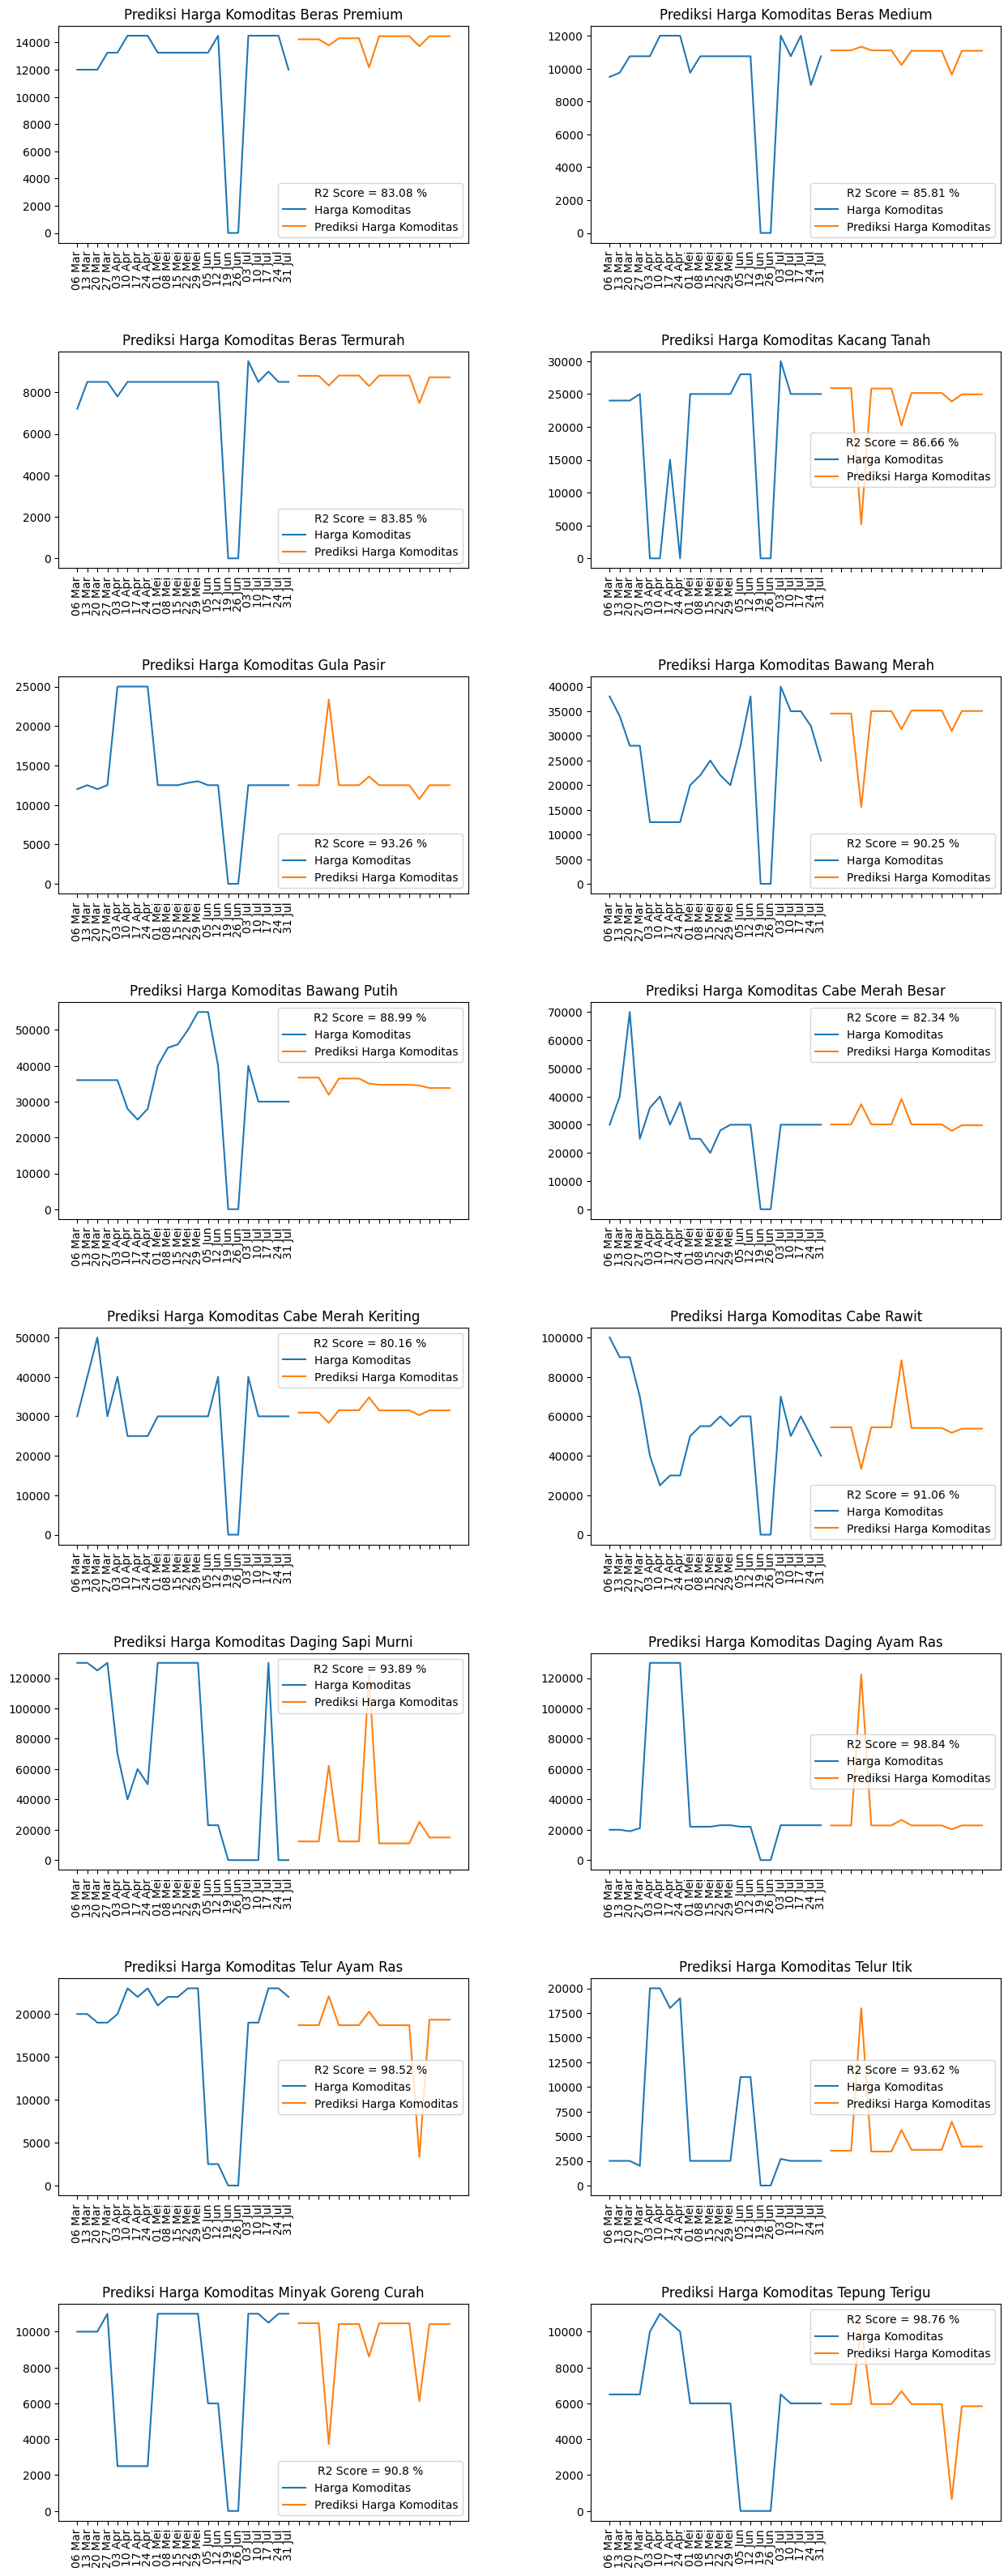

In [38]:
from sklearn.ensemble import RandomForestRegressor
import math

martapura_reg_df_raw_train, martapura_reg_df_raw_test = make_training_testing_raw_dfs(excel_file, training_sheet_names, testing_sheet_names)

all_komoditas = martapura_reg_df_raw_train["Komoditas"].tolist()
x_test = make_x_test(martapura_reg_df_raw_test)

# Compute the number of rows and columns needed for the subplots
num_plots = len(all_komoditas)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

def plot_prediction(x_test, pasar_reg_df_raw_train, pasar_reg_df_raw_test):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), squeeze=False)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axs = axs.ravel()  # Flatten the subplots array

    for i, komoditas in enumerate(all_komoditas):
        all_pasar_dates = pasar_reg_df_raw_train.columns[1:].tolist()
        pasar_day_list = [int(split_dd_mm_format(date)[0]) for date in all_pasar_dates]
        pasar_month_list = [convert_month_to_number(split_dd_mm_format(date)[1]) for date in all_pasar_dates]
        pasar_price_list = pasar_reg_df_raw_train[pasar_reg_df_raw_train["Komoditas"] == komoditas].iloc[0,1:].tolist()
        pasar_reg_df = pd.DataFrame({'Day': pasar_day_list, 'Month': pasar_month_list, 'Price': pasar_price_list})
        pasar_reg_df["Komoditas"] = komoditas
        X = pasar_reg_df[["Day","Month"]].values
        y = pasar_reg_df["Price"].values
        nan_positions = np.isnan(y)
        y[nan_positions] = 0

        reg = RandomForestRegressor()
        reg.fit(X,y)

        prediction_score = reg.score(X,y)*100
        prediction = reg.predict(x_test)
        print(f'Regression Score = {prediction_score:.2f} %')
        x_label_train = pasar_reg_df_raw_train.columns[1:].tolist()
        x_label_test = pasar_reg_df_raw_test.columns[1:].tolist()

        ax = axs[i]
        ax.plot(x_label_train,y,label="Harga Komoditas")
        ax.plot(x_label_test,prediction,label="Prediksi Harga Komoditas")
        ax.set_xticklabels(x_label_train, rotation=90)
        ax.legend(title=f'R2 Score = {round(prediction_score,2)} %')
        ax.set_title(f"Prediksi Harga Komoditas {komoditas}")

    # Hide unused subplots
    for j in range(num_plots, num_rows * num_cols):
        axs[j].axis('off')s

    plt.show()

plot_prediction(x_test, martapura_reg_df_raw_train, martapura_reg_df_raw_test)

## Gambut

HARGA PANGAN DI PASAR GAMBUT 2017
MARET


,Komoditas,06 Mar,13 Mar,20 Mar,27 Mar,Rata-Rata
8,Beras Premium,12000,12000,12000,13250,12312.5
9,Beras Medium,9500,9750,10750,10750,10187.5
10,Beras Termurah,7200,8500,8500,8500,8175
13,Kacang Tanah,24000,24000,24000,25000,24250
14,Gula Pasir,12000,12500,12000,12500,12250
16,Bawang Merah,38000,34000,28000,28000,32000
17,Bawang Putih,36000,36000,36000,36000,36000
19,Cabe Merah Besar,30000,40000,70000,25000,41250
20,Cabe Merah Keriting,30000,40000,50000,30000,37500
21,Cabe Rawit,100000,90000,90000,70000,87500


HARGA PANGAN DI PASAR GAMBUT 2017
MARET


,Komoditas,06 Mar,13 Mar,20 Mar,27 Mar,Rata-Rata
8,Beras Premium,12000,12000,12000,13250,12312.5
9,Beras Medium,9500,9750,10750,10750,10187.5
10,Beras Termurah,7200,8500,8500,8500,8175
13,Kacang Tanah,24000,24000,24000,25000,24250
14,Gula Pasir,12000,12500,12000,12500,12250
16,Bawang Merah,38000,34000,28000,28000,32000
17,Bawang Putih,36000,36000,36000,36000,36000
19,Cabe Merah Besar,30000,40000,70000,25000,41250
20,Cabe Merah Keriting,30000,40000,50000,30000,37500
21,Cabe Rawit,100000,90000,90000,70000,87500


HARGA PANGAN DI PASAR GAMBUT 2017
APRIL


,Komoditas,03 Apr,10 Apr,17 Apr,24 Apr,Rata-Rata
8,Beras Premium,13250,14500,14500,14500,14187.5
9,Beras Medium,10750,12000,12000,12000,11687.5
10,Beras Termurah,7800,8500,8500,8500,8325.0
12,Kedelai,0,0,15000,0,15000.0
13,Kacang Tanah,25000,25000,25000,25000,25000.0
14,Gula Pasir,12500,12500,12500,12500,12500.0
16,Bawang Merah,36000,28000,25000,28000,29250.0
17,Bawang Putih,36000,40000,30000,38000,36000.0
19,Cabe Merah Besar,40000,25000,25000,25000,28750.0
20,Cabe Merah Keriting,40000,25000,30000,30000,31250.0


HARGA PANGAN DI PASAR GAMBUT 2017
MEI


,Komoditas,01 Mei,08 Mei,15 Mei,22 Mei,29 Mei,Rata-Rata
8,Beras Premium,13250,13250,13250,13250,13250,13250
9,Beras Medium,9750,10750,10750,10750,10750,10550
10,Beras Termurah,8500,8500,8500,8500,8500,8500
13,Kacang Tanah,25000,25000,25000,25000,25000,25000
14,Gula Pasir,12500,12500,12500,12800,13000,12660
16,Bawang Merah,20000,22000,25000,22000,20000,21800
17,Bawang Putih,40000,45000,46000,50000,55000,47200
19,Cabe Merah Besar,25000,25000,20000,28000,30000,25600
20,Cabe Merah Keriting,30000,30000,30000,30000,30000,30000
21,Cabe Rawit,50000,55000,55000,60000,55000,55000


HARGA PANGAN DI PASAR GAMBUT 2017
JUNI


,Komoditas,05 Jun,12 Jun,19 Jun,26 Jun,Rata-Rata
8,Beras Premium,13250,14500,NaN,NaN,13875
9,Beras Medium,10750,10750,NaN,NaN,10750
10,Beras Termurah,8500,8500,NaN,NaN,8500
13,Kacang Tanah,28000,28000,NaN,NaN,28000
14,Gula Pasir,12500,12500,NaN,NaN,12500
16,Bawang Merah,28000,38000,NaN,NaN,33000
17,Bawang Putih,55000,40000,NaN,NaN,47500
19,Cabe Merah Besar,30000,30000,NaN,NaN,30000
20,Cabe Merah Keriting,30000,40000,NaN,NaN,35000
21,Cabe Rawit,60000,60000,NaN,NaN,60000


HARGA PANGAN DI PASAR GAMBUT 2017
JULI


,Komoditas,03 Jul,10 Jul,17 Jul,24 Jul,31 Jul,Rata-Rata
9,Beras Premium,14500,14500,14500,14500,12000,14000
10,Beras Medium,12000,10750,12000,9000,10750,10900
11,Beras Termurah,9500,8500,9000,8500,8500,8800
14,Kacang Tanah,30000,25000,25000,25000,25000,26000
15,Gula Pasir,12500,12500,12500,12500,12500,12500
17,Bawang Merah,40000,35000,35000,32000,25000,33400
18,Bawang Putih,40000,30000,30000,30000,30000,32000
20,Cabe Merah Besar,30000,30000,30000,30000,30000,30000
21,Cabe Merah Keriting,40000,30000,30000,30000,30000,32000
22,Cabe Rawit,70000,50000,60000,50000,40000,54000


HARGA PANGAN DI PASAR GAMBUT 2017
AGUSTUS


,Komoditas,07 Agt,14 Agt,21 Agt,28 Agt,Rata-Rata
8,Beras Premium,10000,11000,12000,12000,11250
9,Beras Medium,8600,9000,8000,8000,8400
10,Beras Termurah,6800,7000,7500,7500,7200
13,Kacang Tanah,28000,28000,26000,28000,27500
14,Gula Pasir,12500,12500,12500,12500,12500
16,Bawang Merah,38000,22000,20000,20000,25000
17,Bawang Putih,40000,30000,20000,20000,27500
19,Cabe Merah Besar,30000,30000,28000,28000,29000
20,Cabe Merah Keriting,40000,40000,25000,28000,33250
21,Cabe Rawit,60000,50000,50000,50000,52500


HARGA PANGAN DI PASAR GAMBUT 2017
SEPTEMBER


,Komoditas,04 Sep,11 Sep,18 Sep,25 Sep,Rata-Rata
8,Beras Premium,14500,14500,14500,14500,14500
9,Beras Medium,10750,10750,10750,12000,11062.5
10,Beras Termurah,8500,8500,8500,8500,8500
13,Kacang Tanah,28000,28000,28000,25000,27250
14,Gula Pasir,12500,12500,12000,12000,12250
16,Bawang Merah,20000,20000,15000,20000,18750
17,Bawang Putih,20000,20000,18000,20000,19500
19,Cabe Merah Besar,20000,25000,28000,20000,23250
20,Cabe Merah Keriting,20000,30000,28000,25000,25750
21,Cabe Rawit,50000,50000,50000,50000,50000


HARGA PANGAN DI PASAR GAMBUT 2017
OKTOBER


,Komoditas,02 Okt,09 Okt,16 Okt,23 Okt,30 Okt,Rata-Rata
8,Beras Premium,14500,NaN,NaN,NaN,NaN,14500
9,Beras Medium,12000,NaN,NaN,NaN,NaN,12000
10,Beras Termurah,9500,NaN,NaN,NaN,NaN,9500
13,Kacang Tanah,25000,NaN,NaN,NaN,NaN,25000
14,Gula Pasir,12000,NaN,NaN,NaN,NaN,12000
16,Bawang Merah,15000,NaN,NaN,NaN,NaN,15000
17,Bawang Putih,17000,NaN,NaN,NaN,NaN,17000
19,Cabe Merah Besar,20000,NaN,NaN,NaN,NaN,20000
20,Cabe Merah Keriting,20000,NaN,NaN,NaN,NaN,20000
21,Cabe Rawit,50000,NaN,NaN,NaN,NaN,50000


HARGA PANGAN DI PASAR GAMBUT 2017
NOVEMBER


,Komoditas,06 Nov,13 Nov,20 Nov,27 Nov,Rata-Rata
8,Beras Premium,10500,NaN,NaN,NaN,10500
9,Beras Medium,9000,NaN,NaN,NaN,9000
10,Beras Termurah,7000,NaN,NaN,NaN,7000
13,Kacang Tanah,25000,NaN,NaN,NaN,25000
14,Gula Pasir,12000,NaN,NaN,NaN,12000
16,Bawang Merah,18000,NaN,NaN,NaN,18000
17,Bawang Putih,17000,NaN,NaN,NaN,17000
19,Cabe Merah Besar,20000,NaN,NaN,NaN,20000
20,Cabe Merah Keriting,20000,NaN,NaN,NaN,20000
21,Cabe Rawit,50000,NaN,NaN,NaN,50000


Regression Score = 82.32 %
Regression Score = 85.37 %
Regression Score = 82.84 %


IndexError: single positional indexer is out-of-bounds

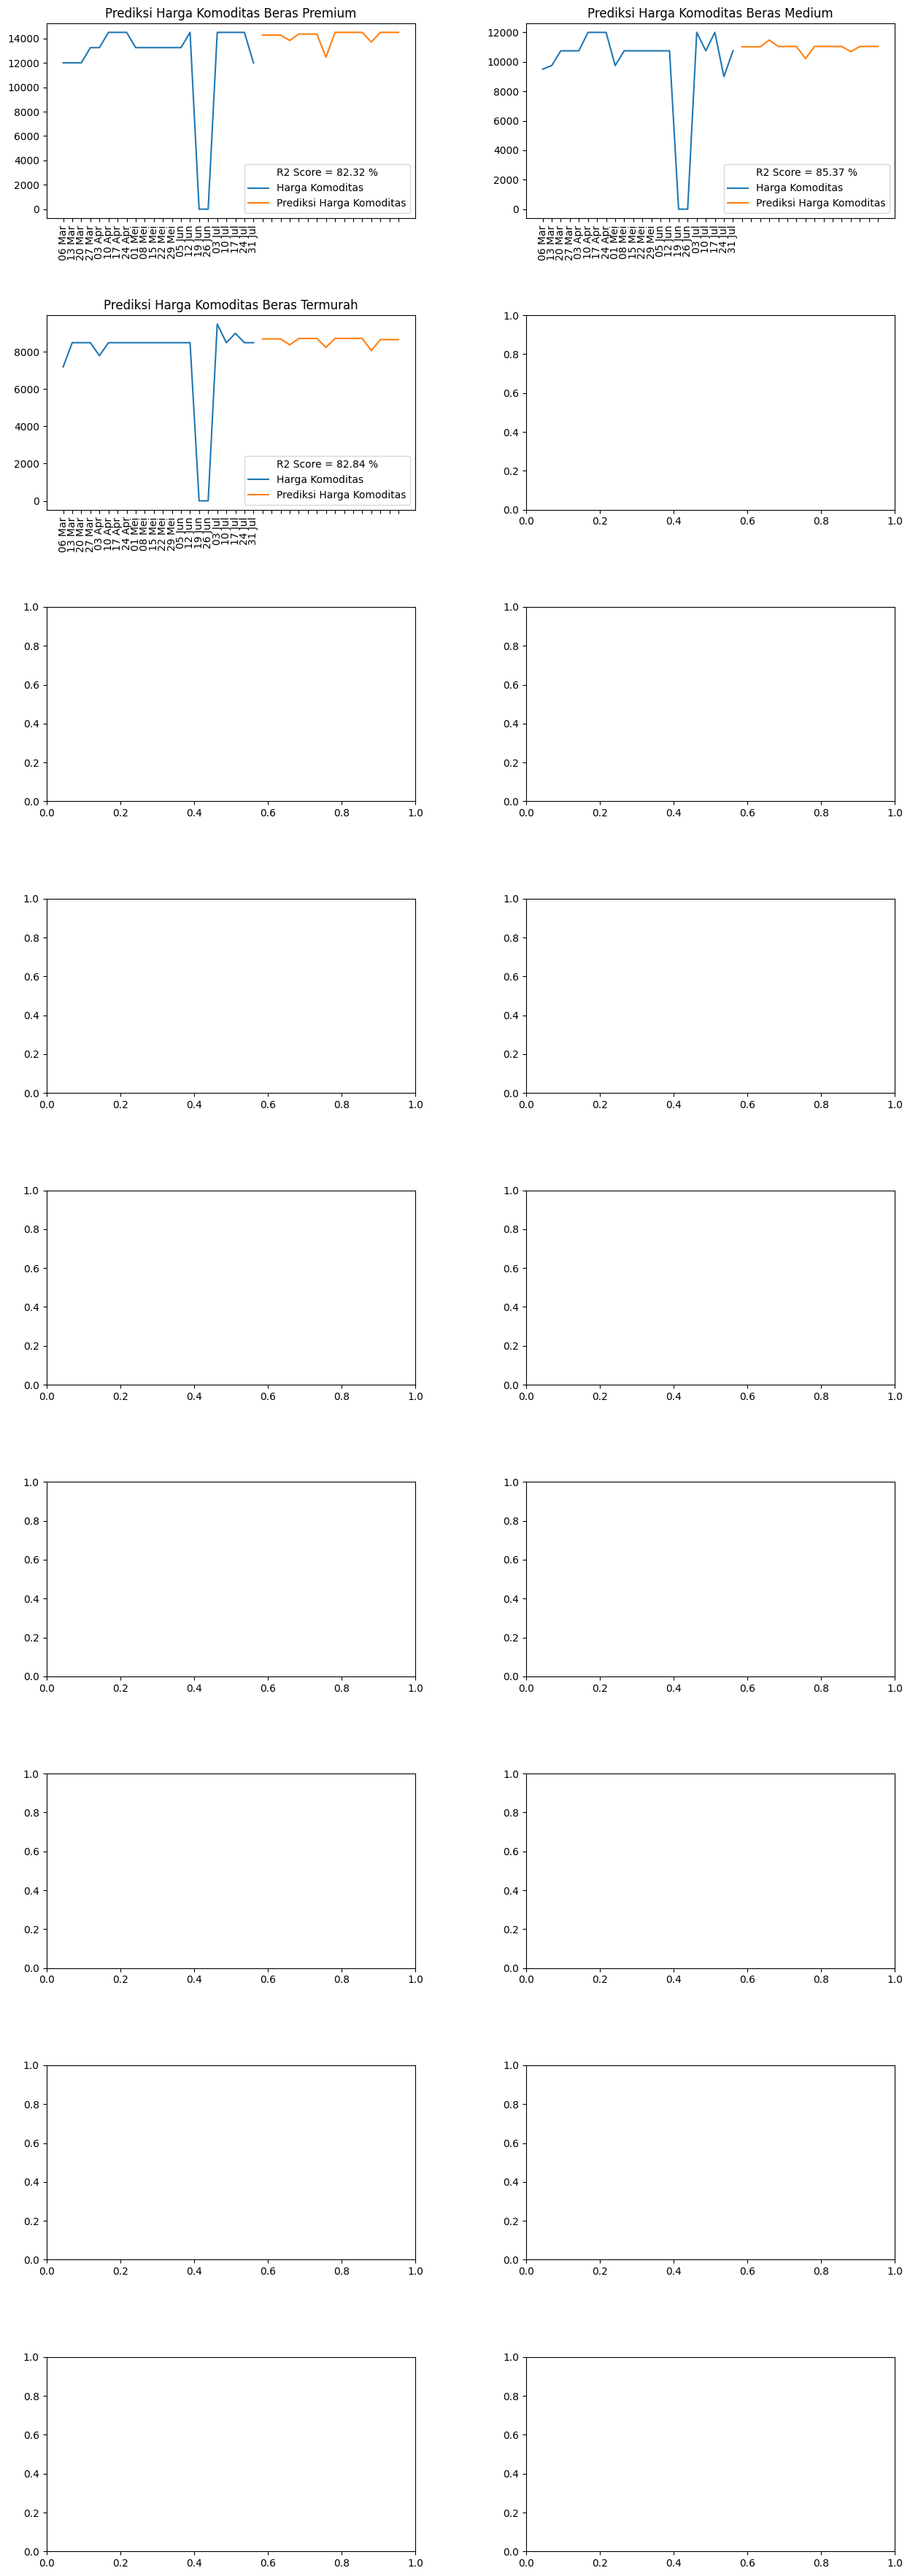

In [37]:
excel_file = "HARGA PANGAN DI PASAR GAMBUT 2017.xlsx"
training_sheet_names = ["MARET","APRIL","MEI","JUNI","JULI"]
testing_sheet_names = ["AGUSTUS","SEPTEMBER","OKTOBER","NOVEMBER"]

gambut_reg_df_raw_train, gambut_reg_df_raw_test = make_training_testing_raw_dfs(excel_file, training_sheet_names, testing_sheet_names)

x_test = make_x_test(gambut_reg_df_raw_test)

plot_prediction(x_test, gambut_reg_df_raw_train, gambut_reg_df_raw_test)

## Astambul

HARGA PANGAN DI PASAR ASTAMBUL 2017
MARET


,Komoditas,06 Mar,13 Mar,20 Mar,27 Mar,Rata-Rata
8,Beras Premium,14500,14500,15000,14500,14625
9,Beras Medium,12000,12000,12000,12000,12000
10,Beras Termurah,8500,8500,8500,8500,8500
11,Jagung,10000,10000,10000,10000,10000
13,Kacang Tanah,26000,25500,25000,25000,25375
14,Gula Pasir,13000,13000,13000,13000,13000
16,Bawang Merah,30000,32000,33000,33000,32000
17,Bawang Putih,36000,35000,35000,35000,35250
19,Cabe Merah Besar,30000,30000,30000,30000,30000
20,Cabe Merah Keriting,50000,50000,60000,50000,52500


HARGA PANGAN DI PASAR ASTAMBUL 2017
MARET


,Komoditas,06 Mar,13 Mar,20 Mar,27 Mar,Rata-Rata
8,Beras Premium,14500,14500,15000,14500,14625
9,Beras Medium,12000,12000,12000,12000,12000
10,Beras Termurah,8500,8500,8500,8500,8500
11,Jagung,10000,10000,10000,10000,10000
13,Kacang Tanah,26000,25500,25000,25000,25375
14,Gula Pasir,13000,13000,13000,13000,13000
16,Bawang Merah,30000,32000,33000,33000,32000
17,Bawang Putih,36000,35000,35000,35000,35250
19,Cabe Merah Besar,30000,30000,30000,30000,30000
20,Cabe Merah Keriting,50000,50000,60000,50000,52500


HARGA PANGAN DI PASAR ASTAMBUL 2017
APRIL


,Komoditas,03 Apr,10 Apr,17 Apr,24 Apr,Rata-Rata
8,Beras Premium,14650,14500,14500,15500,14787.5
9,Beras Medium,12000,12000,12000,12000,12000
10,Beras Termurah,8500,8500,8500,9000,8625
11,Jagung,10000,11000,10000,11000,10500
13,Kacang Tanah,27000,26000,26000,26000,26250
14,Gula Pasir,13000,13000,13000,13000,13000
16,Bawang Merah,32000,32000,31000,30000,31250
17,Bawang Putih,34000,36000,35000,38000,35750
19,Cabe Merah Besar,30000,25000,30000,25000,27500
20,Cabe Merah Keriting,50000,40000,40000,30000,40000


HARGA PANGAN DI PASAR ASTAMBUL 2017
MEI


,Komoditas,01 Mei,08 Mei,15 Mei,22 Mei,29 Mei,Rata-Rata
8,Beras Premium,14500,14500,13250,13250,14500,14000
9,Beras Medium,10000,10800,12000,10000,12000,10960
10,Beras Termurah,8500,8500,8500,8500,8500,8500
11,Jagung,11000,11000,10000,11000,11000,10800
13,Kacang Tanah,25000,25000,25000,32000,32000,27800
14,Gula Pasir,12500,12500,13000,13000,12500,12700
16,Bawang Merah,26000,26000,28000,25000,25000,26000
17,Bawang Putih,45000,45000,48000,52000,58000,49600
19,Cabe Merah Besar,20000,20000,15000,15000,50000,24000
20,Cabe Merah Keriting,30000,30000,25000,25000,40000,30000


HARGA PANGAN DI PASAR ASTAMBUL 2017
JUNI


,Komoditas,05 Jun,12 Jun,19 Jun,26 Jun,Rata-Rata
8,Beras Premium,13250,13250,14500,13250,13562.5
9,Beras Medium,10800,10800,12000,10000,10900
10,Beras Termurah,8500,8500,8500,8500,8500
11,Jagung,10000,10000,10000,11000,10250
13,Kacang Tanah,27000,27000,30000,26000,27500
14,Gula Pasir,12500,12500,12500,12500,12500
16,Bawang Merah,28000,36000,32000,40000,34000
17,Bawang Putih,52000,32000,36000,30000,37500
19,Cabe Merah Besar,30000,30000,35000,35000,32500
20,Cabe Merah Keriting,27000,27000,25000,33000,28000


HARGA PANGAN DI PASAR ASTAMBUL 2017
JULI


,Komoditas,03 Jul,10 Jul,17 Jul,24 Jul,31 Jul,Rata-Rata
8,Beras Premium,13250,13250,13250,12000,13250,13000
9,Beras Medium,10000,8500,10800,10250,10800,10070
10,Beras Termurah,8500,7250,8500,8500,8500,8250
11,Jagung,10000,12000,12000,12000,12000,11600
13,Kacang Tanah,26000,26000,28000,26000,28000,26800
14,Gula Pasir,12500,13000,13000,12500,13000,12800
16,Bawang Merah,40000,36000,35000,33000,30000,34800
17,Bawang Putih,30000,25000,25000,25000,25000,26000
19,Cabe Merah Besar,35000,30000,25000,35000,30000,31000
20,Cabe Merah Keriting,33000,30000,25000,30000,25000,28600


HARGA PANGAN DI PASAR ASTAMBUL 2017
AGUSTUS


,Komoditas,07 Agt,14 Agt,21 Agt,28 Agt,Rata-Rata
8,Beras Premium,12000,12000,12000,12000,12000
9,Beras Medium,9000,9500,9500,9500,9375
10,Beras Termurah,7750,7250,7250,7250,7375
11,Jagung,12000,13000,13000,13000,12750
13,Kacang Tanah,28000,27000,27000,26000,27000
14,Gula Pasir,12500,12500,12000,12000,12250
16,Bawang Merah,25000,22000,21000,20000,22000
17,Bawang Putih,25000,25000,25000,24000,24750
19,Cabe Merah Besar,25000,30000,25000,32000,28000
20,Cabe Merah Keriting,25000,30000,30000,30000,28750


HARGA PANGAN DI PASAR ASTAMBUL 2017
SEPTEMBER


,Komoditas,04 Sep,11 Sep,18 Sep,25 Sep,Rata-Rata
8,Beras Premium,12000,12000,12000,12000,12000
9,Beras Medium,9500,9500,9500,9500,9500
10,Beras Termurah,7250,7750,7750,7250,7500
11,Jagung,13000,12000,12500,12000,12375
13,Kacang Tanah,28000,27000,27000,26000,27000
14,Gula Pasir,12000,12000,12000,12000,12000
16,Bawang Merah,20000,20000,18000,14000,18000
17,Bawang Putih,22000,22000,18000,20000,20500
19,Cabe Merah Besar,40000,30000,25000,25000,30000
20,Cabe Merah Keriting,40000,30000,0,0,35000


HARGA PANGAN DI PASAR ASTAMBUL 2017
OKTOBER


,Komoditas,02 Okt,09 Okt,16 Okt,23 Okt,30 Okt,Rata-Rata
8,Beras Premium,12500,12500,12500,12500,NaN,12500
9,Beras Medium,10000,10000,10000,10625,NaN,10156.25
10,Beras Termurah,7500,7500,8500,8125,NaN,7906.25
11,Jagung,12000,11000,11000,11000,NaN,11250
13,Kacang Tanah,25000,27000,27000,20000,NaN,24750
14,Gula Pasir,12000,12000,12500,12500,NaN,12250
16,Bawang Merah,15000,18000,18000,18000,NaN,17250
17,Bawang Putih,18000,18000,18000,15000,NaN,17250
19,Cabe Merah Besar,30000,30000,25000,30000,NaN,28750
21,Cabe Rawit,40000,30000,32000,40000,NaN,35500


HARGA PANGAN DI PASAR ASTAMBUL 2017
NOVEMBER


,Komoditas,06 Nov,13 Nov,20 Nov,27 Nov,Rata-Rata
8,Beras Premium,NaN,12500,11875,12500,12291.666667
9,Beras Medium,NaN,11250,9375,9375,10000
10,Beras Termurah,NaN,8125,8125,8125,8125
11,Jagung,NaN,12000,12000,11000,11666.666667
13,Kacang Tanah,NaN,28000,26000,28000,27333.333333
14,Gula Pasir,NaN,12000,11500,11500,11666.666667
16,Bawang Merah,NaN,20000,18000,20000,19333.333333
17,Bawang Putih,NaN,20000,18000,19000,19000
19,Cabe Merah Besar,NaN,25000,30000,35000,30000
21,Cabe Rawit,NaN,40000,40000,60000,46666.666667


Regression Score = 92.04 %
Regression Score = 89.37 %
Regression Score = 78.12 %
Regression Score = 80.45 %
Regression Score = 85.68 %
Regression Score = 88.71 %
Regression Score = 91.23 %
Regression Score = 82.85 %
Regression Score = 94.27 %
Regression Score = 98.26 %


IndexError: single positional indexer is out-of-bounds

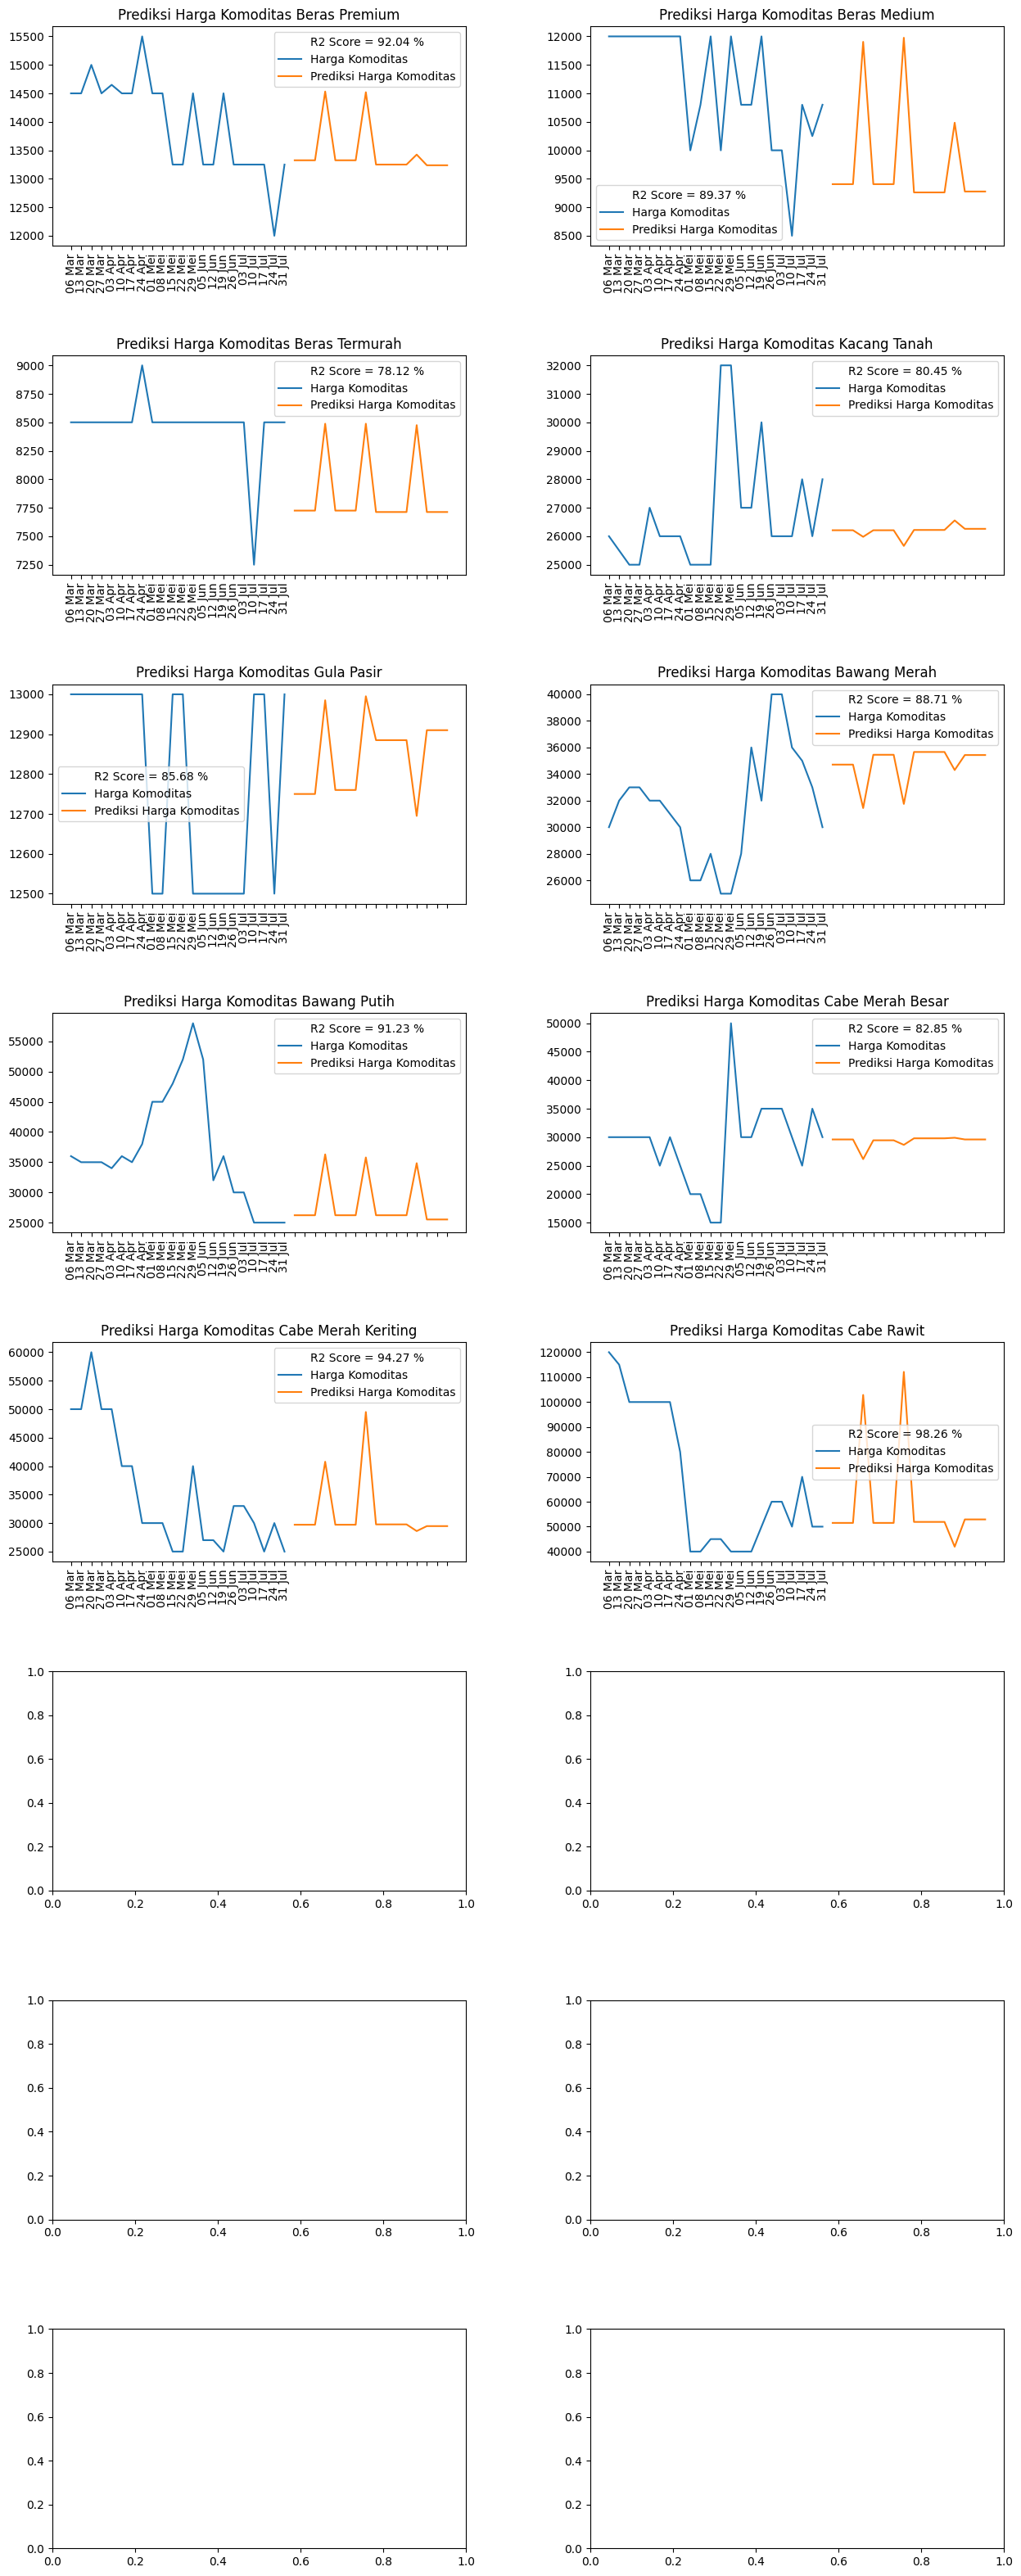

In [ ]:
excel_file = "HARGA PANGAN DI PASAR ASTAMBUL 2017.xlsx"
training_sheet_names = ["MARET","APRIL","MEI","JUNI","JULI"]
testing_sheet_names = ["AGUSTUS","SEPTEMBER","OKTOBER","NOVEMBER"]

astambul_reg_df_raw_train, astambul_reg_df_raw_test = make_training_testing_raw_dfs(excel_file, training_sheet_names, testing_sheet_names)

x_test = make_x_test(astambul_reg_df_raw_test)

plot_prediction(x_test, astambul_reg_df_raw_train, astambul_reg_df_raw_test)